## Introduction 

In this project we will try to learn how to work with RNNs in Keras. We will mostly follow Chapter 15 of Aurelion Geron's book on Machine Leraning (2nd Ed.). Note that we had already learnt how to use RNNs in pytorch through Udacity's course on  Introduction to Deep Learning with PyTorch. Our aim here will be to do the same in Keras. 

## Generating train and test sequences 

We will use a simple sine wave to produce our sequences

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
time_steps=np.arange(0, 5002*np.pi, np.pi/100 )
time_steps

array([0.00000000e+00, 3.14159265e-02, 6.28318531e-02, ...,
       1.57141522e+04, 1.57141836e+04, 1.57142150e+04])

In [4]:
series = np.sin(time_steps).reshape(-1,1)
series

array([[ 0.        ],
       [ 0.03141076],
       [ 0.06279052],
       ...,
       [-0.09410831],
       [-0.06279052],
       [-0.03141076]])

In [5]:
series.shape

(500200, 1)

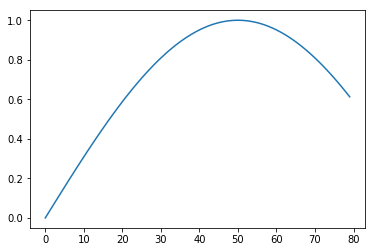

In [6]:
plt.plot(series[:80])
plt.show()

We now wish to convert this into 50 batches. Each consisting of 20 sequences with each sequence consisting of 50 time steps. For this we will first reshape our data to be a 2d array with 20 rows, then we will use a sliding window of size 50 to divide the sequence into batches

In [7]:
series.size

500200

In [8]:
series=series.reshape(20,-1,1)
series.shape

(20, 25010, 1)

In [9]:
# the column index at which each new batch starts
start_idx=np.arange(0,2500,50)
start_idx

array([   0,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
       1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600,
       1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150,
       2200, 2250, 2300, 2350, 2400, 2450])

In [10]:
start_idx.size

50

In [11]:
# extracting the input sequences
x_batches=[]
for idx in start_idx:
    batch=series[:, idx: idx+50, :]
    x_batches.append(batch)

In [12]:
# checking that all the batches have the correct shape
ctr=1
for batch in x_batches:
    print("batch: {} shape: {}".format(ctr, batch.shape))
    ctr+=1  

batch: 1 shape: (20, 50, 1)
batch: 2 shape: (20, 50, 1)
batch: 3 shape: (20, 50, 1)
batch: 4 shape: (20, 50, 1)
batch: 5 shape: (20, 50, 1)
batch: 6 shape: (20, 50, 1)
batch: 7 shape: (20, 50, 1)
batch: 8 shape: (20, 50, 1)
batch: 9 shape: (20, 50, 1)
batch: 10 shape: (20, 50, 1)
batch: 11 shape: (20, 50, 1)
batch: 12 shape: (20, 50, 1)
batch: 13 shape: (20, 50, 1)
batch: 14 shape: (20, 50, 1)
batch: 15 shape: (20, 50, 1)
batch: 16 shape: (20, 50, 1)
batch: 17 shape: (20, 50, 1)
batch: 18 shape: (20, 50, 1)
batch: 19 shape: (20, 50, 1)
batch: 20 shape: (20, 50, 1)
batch: 21 shape: (20, 50, 1)
batch: 22 shape: (20, 50, 1)
batch: 23 shape: (20, 50, 1)
batch: 24 shape: (20, 50, 1)
batch: 25 shape: (20, 50, 1)
batch: 26 shape: (20, 50, 1)
batch: 27 shape: (20, 50, 1)
batch: 28 shape: (20, 50, 1)
batch: 29 shape: (20, 50, 1)
batch: 30 shape: (20, 50, 1)
batch: 31 shape: (20, 50, 1)
batch: 32 shape: (20, 50, 1)
batch: 33 shape: (20, 50, 1)
batch: 34 shape: (20, 50, 1)
batch: 35 shape: (20, 5

In [13]:
# extracting the output sequences
# these are same as input sequences shifted by 1 time_step
y_batches=[]
for idx in start_idx:
    batch=series[:,idx+1:idx+51,:]
    y_batches.append(batch)

In [14]:
# making sure all the y_batches have the correct shape
ctr=1
for batch in y_batches:
    print('batch: {} shape: {}'.format(ctr, batch.shape))
    ctr+=1

batch: 1 shape: (20, 50, 1)
batch: 2 shape: (20, 50, 1)
batch: 3 shape: (20, 50, 1)
batch: 4 shape: (20, 50, 1)
batch: 5 shape: (20, 50, 1)
batch: 6 shape: (20, 50, 1)
batch: 7 shape: (20, 50, 1)
batch: 8 shape: (20, 50, 1)
batch: 9 shape: (20, 50, 1)
batch: 10 shape: (20, 50, 1)
batch: 11 shape: (20, 50, 1)
batch: 12 shape: (20, 50, 1)
batch: 13 shape: (20, 50, 1)
batch: 14 shape: (20, 50, 1)
batch: 15 shape: (20, 50, 1)
batch: 16 shape: (20, 50, 1)
batch: 17 shape: (20, 50, 1)
batch: 18 shape: (20, 50, 1)
batch: 19 shape: (20, 50, 1)
batch: 20 shape: (20, 50, 1)
batch: 21 shape: (20, 50, 1)
batch: 22 shape: (20, 50, 1)
batch: 23 shape: (20, 50, 1)
batch: 24 shape: (20, 50, 1)
batch: 25 shape: (20, 50, 1)
batch: 26 shape: (20, 50, 1)
batch: 27 shape: (20, 50, 1)
batch: 28 shape: (20, 50, 1)
batch: 29 shape: (20, 50, 1)
batch: 30 shape: (20, 50, 1)
batch: 31 shape: (20, 50, 1)
batch: 32 shape: (20, 50, 1)
batch: 33 shape: (20, 50, 1)
batch: 34 shape: (20, 50, 1)
batch: 35 shape: (20, 5

Next, we will compare the input and the output of a random sequence

In [15]:
x=x_batches[23][5]
x[:6]

array([[2.64669788e-13],
       [3.14107591e-02],
       [6.27905195e-02],
       [9.41083133e-02],
       [1.25333234e-01],
       [1.56434465e-01]])

In [16]:
y=y_batches[23][5]
y[:5]

array([[0.03141076],
       [0.06279052],
       [0.09410831],
       [0.12533323],
       [0.15643447]])

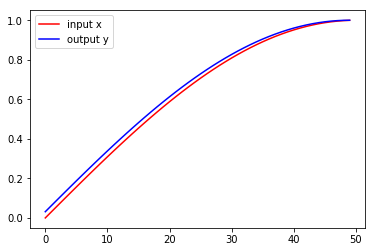

In [17]:
plt.plot(x, 'r', label='input x')
plt.plot(y, 'b', label='output y')
plt.legend()
plt.show()

We see that indeed the sequence in y is shifted from that in x by a single time step. 

## Split into training and validation sets

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# train_size = 70%
seed = 42
train_size = 0.7
X_train, X_val, y_train, y_val = train_test_split(x_batches, y_batches, train_size=train_size, random_state=True )

C:\Users\agarw\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [20]:
# validation size = 15% of the total data
# this is equivalent to 50% of the remaining sequences after extracting the training data
val_size = 0.5
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, train_size=val_size, random_state=True )

In [21]:
# number of batches in training and test sequences
print('num x_batches_train: {}'.format(len(X_train)))
print('num y_batches_train: {}'.format(len(y_train)))
print('num x_batches_val: {}'.format(len(X_val)))
print('num y_batches_val: {}'.format(len(y_val)))
print('num x_batches_test: {}'.format(len(X_test)))
print('num y_batches_test: {}'.format(len(y_test)))

num x_batches_train: 35
num y_batches_train: 35
num x_batches_val: 7
num y_batches_val: 7
num x_batches_test: 8
num y_batches_test: 8


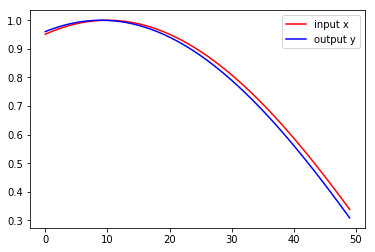

In [22]:
# compare the input and the output sequences of a random sequence in training batches
x = X_train[17][14]
y = y_train[17][14]
plt.plot(x, 'r', label = 'input x')
plt.plot(y, 'b', label = 'output y')
plt.legend()
plt.show()

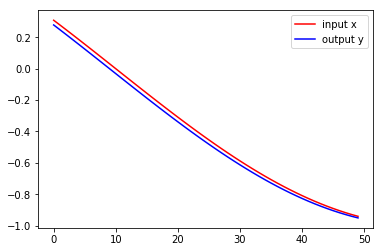

In [23]:
# compare the input and the output sequences of a random sequence in validation batches
x = X_val[6][14]
y = y_val[6][14]
plt.plot(x, 'r', label = 'input x')
plt.plot(y, 'b', label = 'output y')
plt.legend()
plt.show()

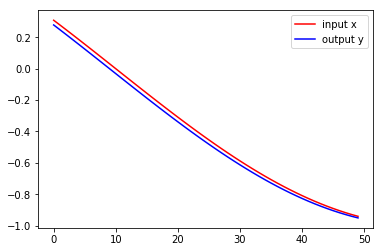

In [24]:
# compare the input and the output sequences of a random sequence in test batches
x = X_val[6][14]
y = y_val[6][14]
plt.plot(x, 'r', label = 'input x')
plt.plot(y, 'b', label = 'output y')
plt.legend()
plt.show()

## Building a single neuron simple RNN

Having prepared our data, let us now import and train the Simple RNN provided by keras on these sequences. The relevant documentation for SimpleRNN can be found [here](https://keras.io/layers/recurrent/).

In [25]:
from keras.models import Sequential
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [26]:
# A 1 layer RNN with a single neuron
# if we wish to get the output of each time_step, we must set
# return_sequences=True 
# the sequence can be of any length => input shape is [None, 1]
# since this is a simple RNN with just 1 neuron, it will be unfair to be able to learn to correctly predict the output for each time_step
# therefore for now will only predict the expected value at the end of the sequence
simpleRNN = Sequential([SimpleRNN(units = 1, input_shape= [None, 1], 
                                  return_sequences = False)] )

Instructions for updating:
Colocations handled automatically by placer.


### compile, fit and evaluate the model

In [27]:
optimizer='adam'
simpleRNN.compile(optimizer = optimizer, loss = 'mse')

In [28]:
# let's check the output of the simpleRNN on a single sequence before training
y_pred=simpleRNN.predict(X_train[17][14].reshape(1,50,1))

In [29]:
y_pred.shape

(1, 1)

I just realized that I did not need to split my data into batches and can just pass the batch_size to model.fit() in keras

In [30]:
# joining all the batches in X_train
X_train=np.array(X_train).reshape(-1,50,1)
X_train.shape

(700, 50, 1)

In [31]:
# joining all the batches in y_train
y_train = np.array(y_train).reshape(-1,50,1)
y_train.shape

(700, 50, 1)

In [32]:
# extracting the last value in the prediction sequence
y_true_train=y_train[:,-1]
y_true_train.shape

(700, 1)

In [33]:
# joining all the validation batches
X_val = np.array(X_val).reshape(-1,50,1)
y_val = np.array(y_val).reshape(-1,50,1)
print('X_val shape: {}, y_val_shape: {}'.format(X_val.shape, y_val.shape))

X_val shape: (140, 50, 1), y_val_shape: (140, 50, 1)


In [34]:
# extracting the expected value at the end of each validation sequence
y_true_val=y_val[:,-1]
y_true_val.shape

(140, 1)

In [35]:
# joining all the test sequences
X_test=np.array(X_test).reshape(-1, 50,1)
y_test=np.array(y_test).reshape(-1,50,1)
print('X_test shape: {}, y_test shape: {}'.format(X_test.shape, y_test.shape))

X_test shape: (160, 50, 1), y_test shape: (160, 50, 1)


In [36]:
# extracting the expected value at the end of each test sequence
y_true_test=y_test[:,-1]
y_true_test.shape

(160, 1)

In [37]:
from keras.callbacks import EarlyStopping

In [38]:
# early stopper to stop training if val_loss does not improve over a certain period of training

patience = 20 # training should stop if val_loss does not improve for this many epochs
min_delta = 0.01 # val_loss should improve by atleast this much for training to not stop 
stopper = EarlyStopping(monitor = 'val_loss', min_delta = min_delta, patience = patience, restore_best_weights = True)


In [39]:
# training the model
epochs=200
verbose = 1

simpleRNN.fit(X_train, y_true_train, epochs=epochs, batch_size=20, verbose = verbose,
              callbacks = [stopper], validation_data = (X_val, y_true_val))

Instructions for updating:
Use tf.cast instead.
Train on 700 samples, validate on 140 samples
Epoch 1/200
700/700 [==============================] - 1s 1ms/step - loss: 0.7453 - val_loss: 0.7281
Epoch 2/200
700/700 [==============================] - 1s 1ms/step - loss: 0.7166 - val_loss: 0.7052
Epoch 3/200
700/700 [==============================] - 1s 1ms/step - loss: 0.6950 - val_loss: 0.6844
Epoch 4/200
700/700 [==============================] - 1s 1ms/step - loss: 0.6744 - val_loss: 0.6640
Epoch 5/200
700/700 [==============================] - 1s 1ms/step - loss: 0.6543 - val_loss: 0.6440
Epoch 6/200
700/700 [==============================] - 1s 1ms/step - loss: 0.6346 - val_loss: 0.6243
Epoch 7/200
700/700 [==============================] - 1s 1ms/step - loss: 0.6152 - val_loss: 0.6054
Epoch 8/200
700/700 [==============================] - 1s 1ms/step - loss: 0.5964 - val_loss: 0.5868
Epoch 9/200
700/700 [==============================] - 1s 1ms/step - loss: 0.5780 - val_loss: 0.56

In [40]:
# predictions on the test set
y_test_pred = simpleRNN.predict(X_test)
y_test_pred.shape

(160, 1)

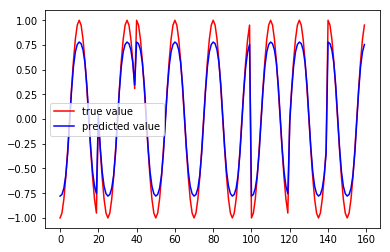

In [41]:
# compare y_true_test and y_test_pred
plt.plot(y_true_test, 'r', label = 'true value')
plt.plot(y_test_pred, 'b', label = 'predicted value')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error as mse

In [43]:
# mse of the test prediction
test_loss = mse(y_true_test, y_test_pred)
print('test loss: {}'.format(test_loss))

test loss: 0.01580986562754157


This was pretty good! 

### let's try predicting all the timesteps in a sequence

In [55]:
simpleRNN2 = Sequential([SimpleRNN(units=1 ,input_shape=[None, 1], return_sequences=True)])

In [56]:
optimizer = 'adam'
simpleRNN2.compile(optimizer = optimizer, loss = 'mse' )

In [57]:
patience = 30
min_delta = 0.01

stopper = EarlyStopping(monitor = 'val_loss', min_delta = min_delta, patience = patience, restore_best_weights = True )

In [58]:
verbose = 1
epochs = 300
simpleRNN2.fit(X_train, y_train, batch_size = 50,  epochs = epochs, callbacks = [stopper], 
               verbose = verbose, validation_data = (X_val, y_val))

Train on 700 samples, validate on 140 samples
Epoch 1/300
700/700 [==============================] - 1s 1ms/step - loss: 1.2599 - val_loss: 1.2524
Epoch 2/300
700/700 [==============================] - 0s 493us/step - loss: 1.2464 - val_loss: 1.2395
Epoch 3/300
700/700 [==============================] - 0s 413us/step - loss: 1.2341 - val_loss: 1.2277
Epoch 4/300
700/700 [==============================] - 0s 429us/step - loss: 1.2228 - val_loss: 1.2173
Epoch 5/300
700/700 [==============================] - 0s 429us/step - loss: 1.2129 - val_loss: 1.2078
Epoch 6/300
700/700 [==============================] - 0s 454us/step - loss: 1.2037 - val_loss: 1.1989
Epoch 7/300
700/700 [==============================] - 0s 433us/step - loss: 1.1949 - val_loss: 1.1903
Epoch 8/300
700/700 [==============================] - 0s 422us/step - loss: 1.1863 - val_loss: 1.1817
Epoch 9/300
700/700 [==============================] - 0s 417us/step - loss: 1.1776 - val_loss: 1.1730
Epoch 10/300
700/700 [=======

700/700 [==============================] - 0s 486us/step - loss: 0.5863 - val_loss: 0.5824
Epoch 80/300
700/700 [==============================] - 1s 742us/step - loss: 0.5791 - val_loss: 0.5753
Epoch 81/300
700/700 [==============================] - 0s 600us/step - loss: 0.5721 - val_loss: 0.5682
Epoch 82/300
700/700 [==============================] - 0s 507us/step - loss: 0.5650 - val_loss: 0.5613
Epoch 83/300
700/700 [==============================] - 0s 489us/step - loss: 0.5581 - val_loss: 0.5544
Epoch 84/300
700/700 [==============================] - 0s 436us/step - loss: 0.5512 - val_loss: 0.5476
Epoch 85/300
700/700 [==============================] - 0s 440us/step - loss: 0.5445 - val_loss: 0.5408
Epoch 86/300
700/700 [==============================] - 0s 507us/step - loss: 0.5378 - val_loss: 0.5342
Epoch 87/300
700/700 [==============================] - 0s 422us/step - loss: 0.5312 - val_loss: 0.5276
Epoch 88/300
700/700 [==============================] - 0s 432us/step - loss:

700/700 [==============================] - 0s 563us/step - loss: 0.0332 - val_loss: 0.0318
Epoch 158/300
700/700 [==============================] - 0s 513us/step - loss: 0.0307 - val_loss: 0.0295
Epoch 159/300
700/700 [==============================] - 0s 499us/step - loss: 0.0285 - val_loss: 0.0274
Epoch 160/300
700/700 [==============================] - 0s 486us/step - loss: 0.0265 - val_loss: 0.0255
Epoch 161/300
700/700 [==============================] - 0s 500us/step - loss: 0.0247 - val_loss: 0.0238
Epoch 162/300
700/700 [==============================] - 0s 489us/step - loss: 0.0231 - val_loss: 0.0224
Epoch 163/300
700/700 [==============================] - 0s 492us/step - loss: 0.0218 - val_loss: 0.0211
Epoch 164/300
700/700 [==============================] - 0s 456us/step - loss: 0.0206 - val_loss: 0.0200
Epoch 165/300
700/700 [==============================] - 0s 463us/step - loss: 0.0195 - val_loss: 0.0190
Epoch 166/300
700/700 [==============================] - 0s 484us/ste

In [60]:
# test predictions 
y_test_pred = simpleRNN2.predict(X_test)
y_test_pred.shape

(160, 50, 1)

In [61]:
s_pred = y_test_pred.reshape(-1,1)
s_true = y_test.reshape(-1,1)
print('prediction shape: {}, true shape: {}'.format(s_pred.shape, s_true.shape))

prediction shape: (8000, 1), true shape: (8000, 1)


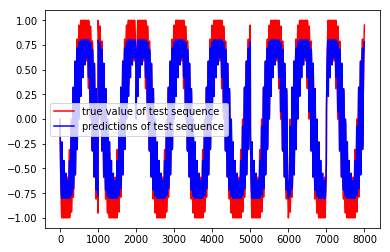

In [63]:
plt.plot(s_true, 'r', label = 'true value of test sequence')
plt.plot(s_pred, 'b', label = 'predictions of test sequence')
plt.legend()
plt.show()

In [64]:
error = mse(s_true, s_pred)
print('test error is: {}'.format(error))

test error is: 0.013673788525691009


Not bad! 